In [1]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing
%matplotlib inline

In [2]:
data = pd.read_csv('/etlstage/PEE_joint/NUS_modules/CS5340/group_data/GME_stock.csv')
data.head()

date  open_price  high_price   low_price  close_price       volume  \
0  2021-01-28  265.000000  483.000000  112.250000   193.600006   58815800.0   
1  2021-01-27  354.829987  380.000000  249.000000   347.510010   93396700.0   
2  2021-01-26   88.559998  150.000000   80.199997   147.979996  178588000.0   
3  2021-01-25   96.730003  159.179993   61.130001    76.790001  177874000.0   
4  2021-01-22   42.590000   76.760002   42.320000    65.010002  196784300.0   

   adjclose_price  
0      193.600006  
1      347.510010  
2      147.979996  
3       76.790001  
4       65.010002

In [3]:
import plotly.figure_factory as ff
fig = ff.create_distplot([data['close_price'].values], ['close_price'])
fig.show()

In [4]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(data, x="date", y="close_price", marginal="rug",
                   hover_data=data.columns)
fig.show()

In [10]:
# n_components = 2

# with pm.Model() as gauss_mix:
#     μ = pm.Normal(
#         "μ",
#         data['close_price'].mean(),
#         10,
#         shape=n_components,
#     )
#     σ = pm.HalfNormal("σ", 10, shape=n_components)
#     weights = pm.Dirichlet("w", np.ones(n_components))

#     x_obs = pm.NormalMixture("close_price", w=weights, mu=μ, sigma=σ, observed=data['close_price'])

In [13]:
# with gauss_mix:
#     trace = pm.sample(5000, n_init=10000, tune=1000)

#     # sample posterior predictive samples
#     ppc_trace = pm.sample_posterior_predictive(trace, var_names=["close_price"])

#     # Get an arviz inference object
#     idata_pymc3 = az.from_pymc3(trace, posterior_predictive=ppc_trace)

/anaconda_env/personal/hdfsh10n/f10ds_spark_py36/lib/python3.6/site-packages/pymc3/sampling.py:468: FutureWarning:

In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, σ, μ]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 31 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [20]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=60)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data['close_price'].values)
    trace_g = pm.sample(1000, tune=1000)

/anaconda_env/personal/hdfsh10n/f10ds_spark_py36/lib/python3.6/site-packages/pymc3/sampling.py:468: FutureWarning:

In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


/anaconda_env/personal/hdfsh10n/f10ds_spark_py36/lib/python3.6/site-packages/arviz/data/io_pymc3.py:92: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



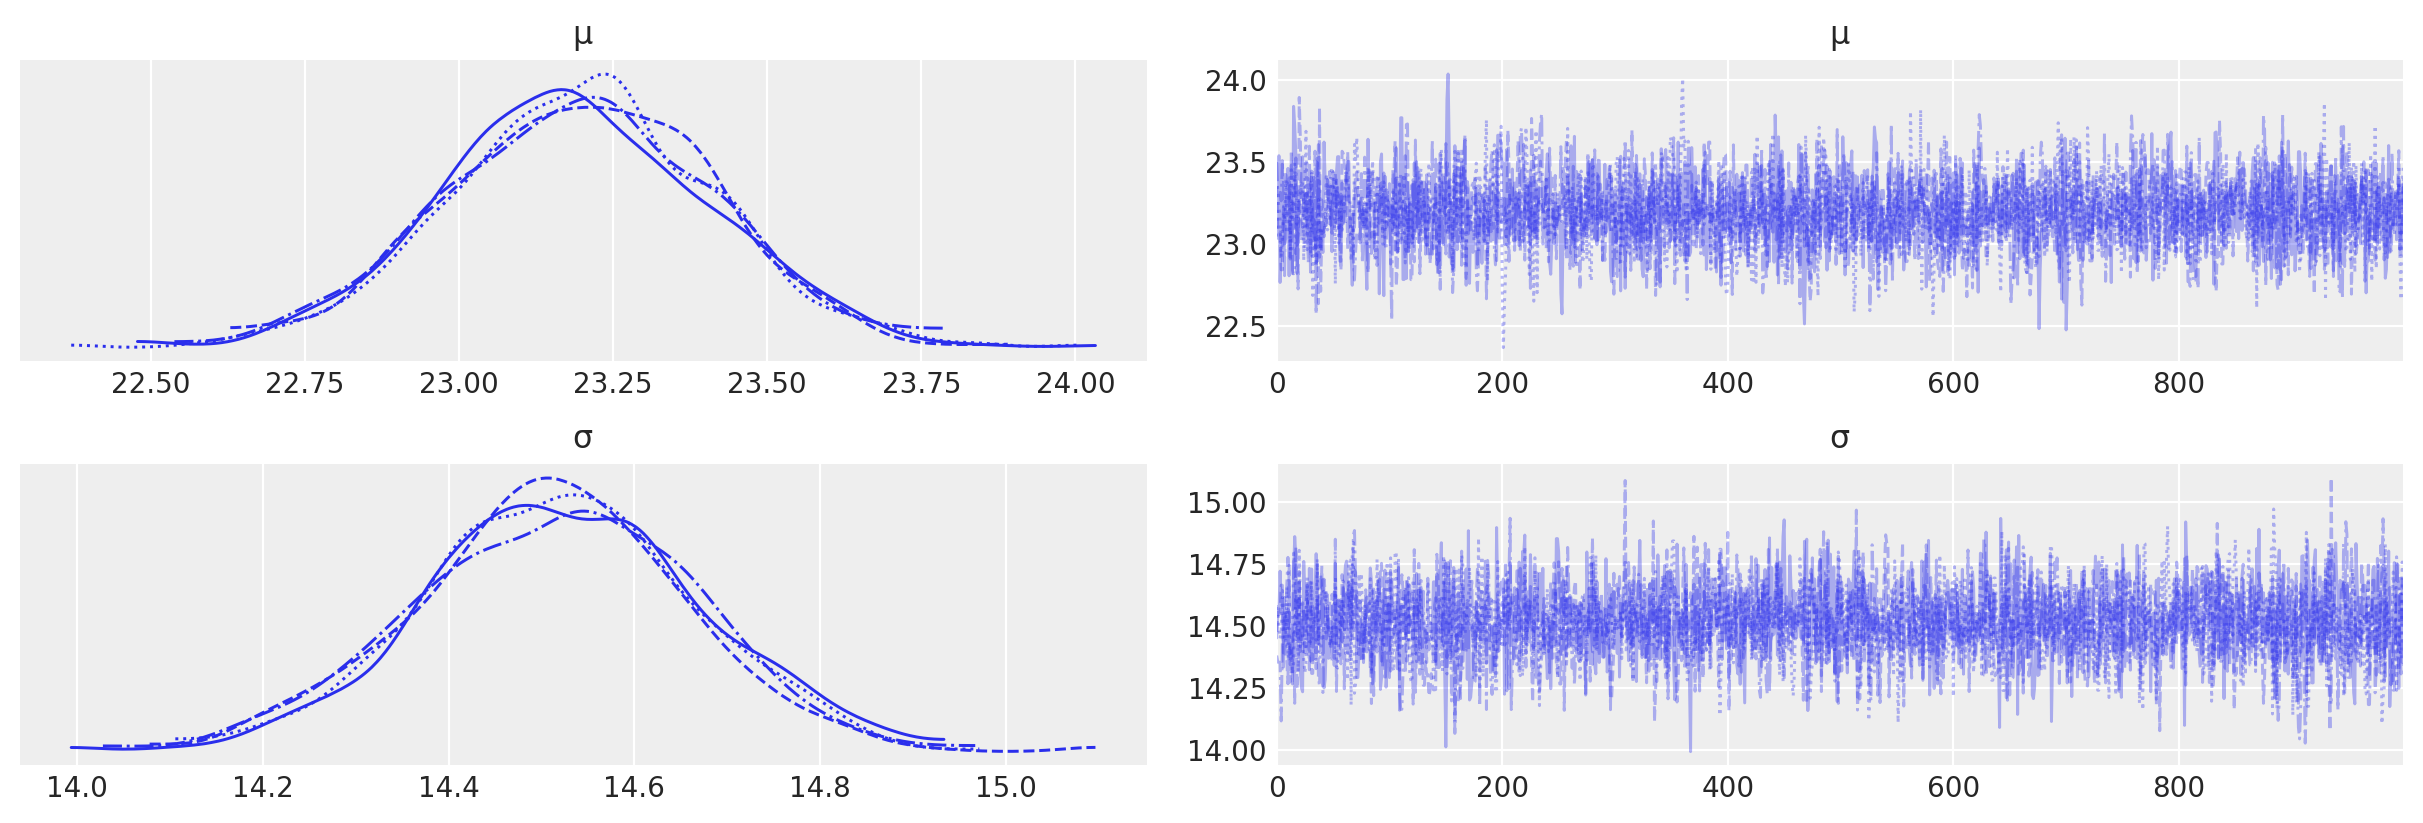

In [21]:
az.plot_trace(trace_g);

/anaconda_env/personal/hdfsh10n/f10ds_spark_py36/lib/python3.6/site-packages/arviz/plots/jointplot.py:144: UserWarning:

plot_joint will be deprecated. Please use plot_pair instead.

/anaconda_env/personal/hdfsh10n/f10ds_spark_py36/lib/python3.6/site-packages/arviz/data/io_pymc3.py:92: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

/anaconda_env/personal/hdfsh10n/f10ds_spark_py36/lib/python3.6/site-packages/arviz/utils.py:409: NumbaWarning:


Compilation is falling back to object mode WITH looplifting enabled because Function "_cov" failed type inference due to: Untyped global name '_dot': cannot determine Numba type of <class 'arviz.utils.maybe_numba_fn'>

File "../../../../../../anaconda_env/personal/hdfsh10n/f10ds_spark_py36/lib/python3.6/site-packages/arviz/utils.py", line 421:
def _cov(

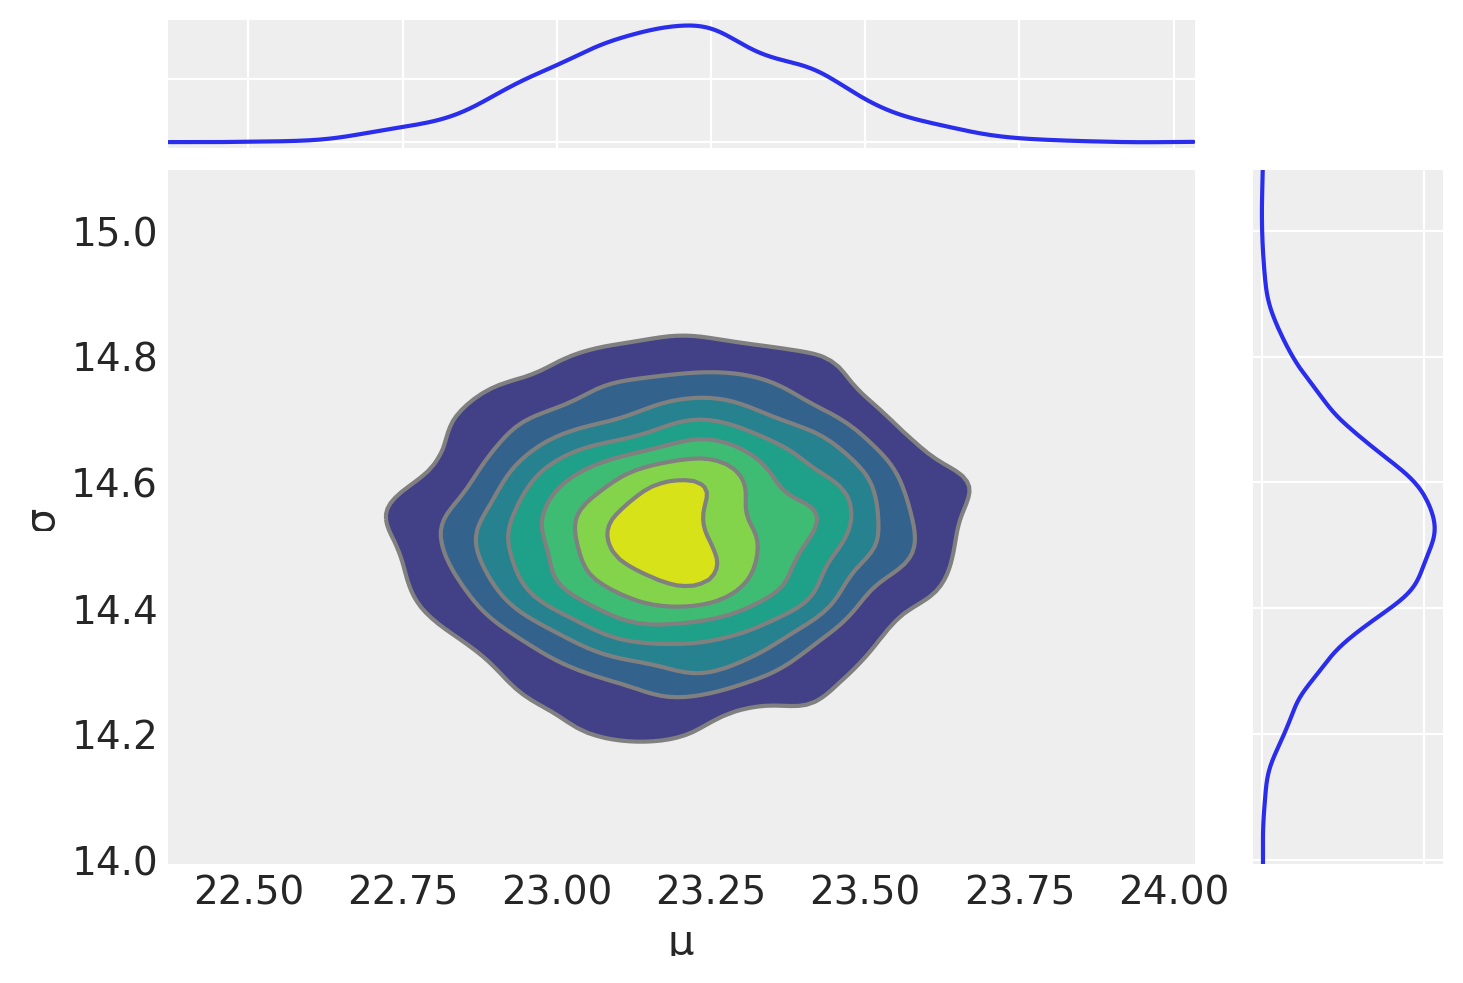

In [22]:
az.plot_joint(trace_g, kind='kde', fill_last=False);

In [23]:
az.summary(trace_g)

/anaconda_env/personal/hdfsh10n/f10ds_spark_py36/lib/python3.6/site-packages/arviz/data/io_pymc3.py:92: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
μ  23.195  0.215  22.818   23.633      0.004    0.003    3375.0  3369.0   
σ  14.516  0.147  14.234   14.794      0.002    0.002    3525.0  3525.0   

   ess_bulk  ess_tail  r_hat  
μ    3376.0    2809.0    1.0  
σ    3540.0    2586.0    1.0

/anaconda_env/personal/hdfsh10n/f10ds_spark_py36/lib/python3.6/site-packages/arviz/data/io_pymc3.py:92: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



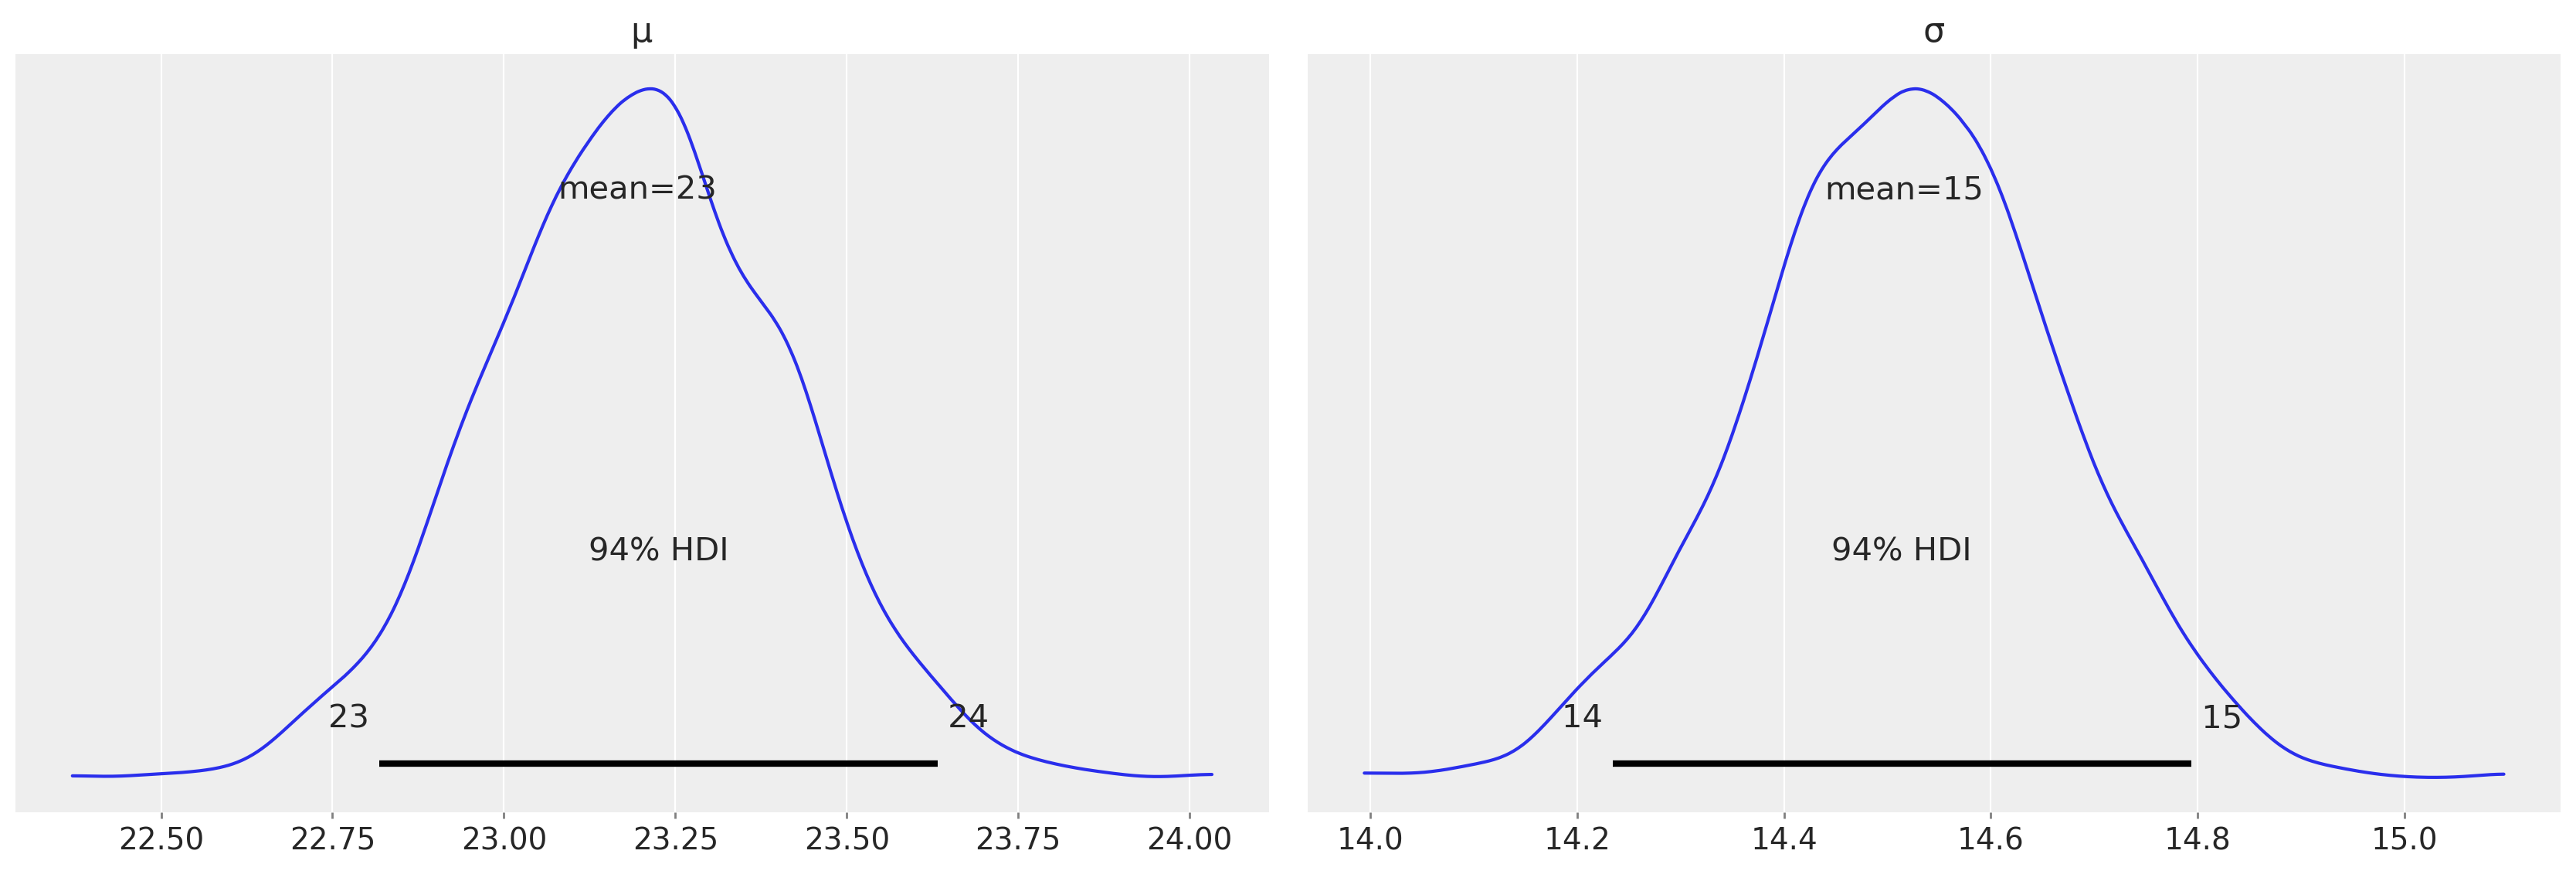

In [24]:
az.plot_posterior(trace_g);

In [34]:
ppc = pm.sample_posterior_predictive(trace_g, samples=1000, model=model_g)
np.asarray(ppc['y']).shape

/anaconda_env/personal/hdfsh10n/f10ds_spark_py36/lib/python3.6/site-packages/pymc3/sampling.py:1691: UserWarning:

samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample



(1000, 4773)

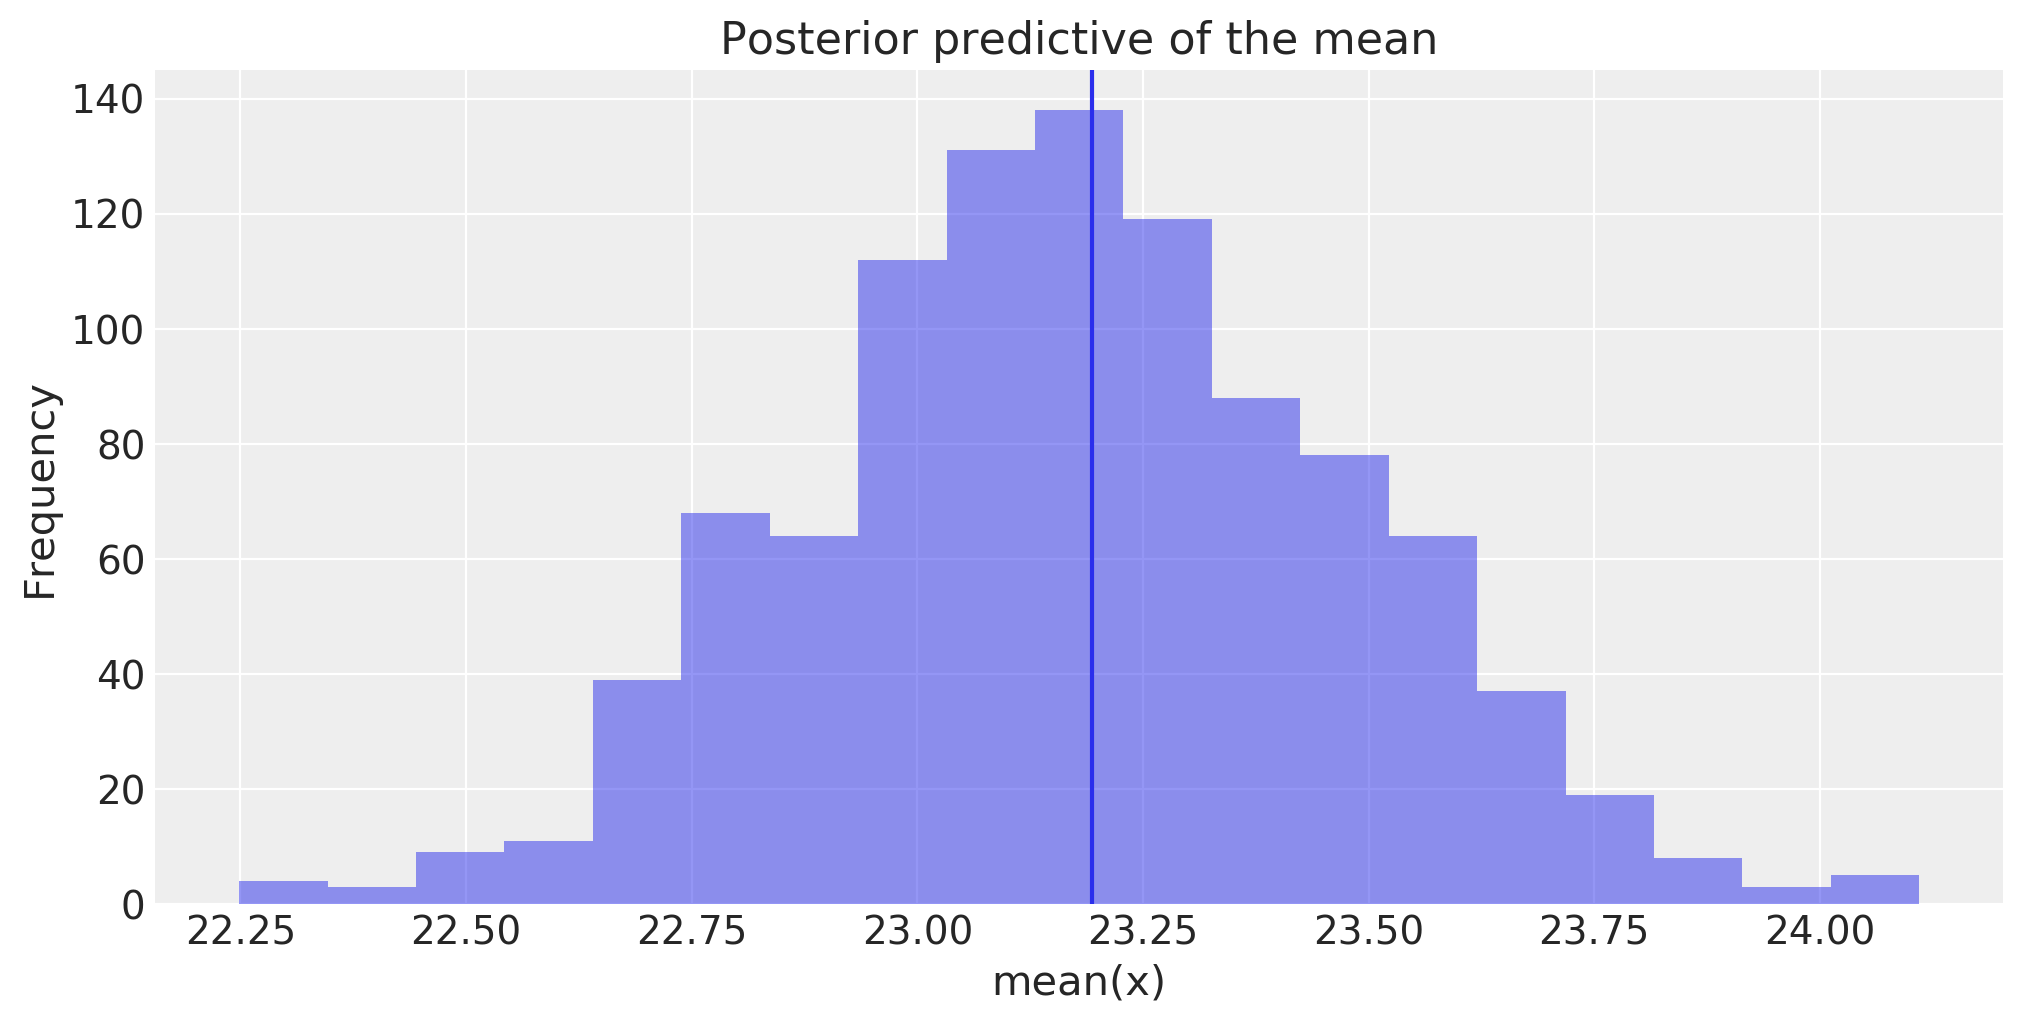

In [38]:
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['y']], bins=19, alpha=0.5)
ax.axvline(data.close_price.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [39]:
data

date  open_price  high_price   low_price  close_price  \
0     2021-01-28  265.000000  483.000000  112.250000   193.600006   
1     2021-01-27  354.829987  380.000000  249.000000   347.510010   
2     2021-01-26   88.559998  150.000000   80.199997   147.979996   
3     2021-01-25   96.730003  159.179993   61.130001    76.790001   
4     2021-01-22   42.590000   76.760002   42.320000    65.010002   
...          ...         ...         ...         ...          ...   
4768  2002-02-20    9.600000    9.875000    9.525000     9.875000   
4769  2002-02-19    9.900000    9.900000    9.375000     9.550000   
4770  2002-02-15   10.000000   10.025000    9.850000     9.950000   
4771  2002-02-14   10.175000   10.195000    9.925000    10.000000   
4772  2002-02-13    9.625000   10.060000    9.525000    10.050000   

           volume  adjclose_price  
0      58815800.0      193.600006  
1      93396700.0      347.510010  
2     178588000.0      147.979996  
3     177874000.0       76.790001  
4     196784300.0       65.010002  
...           ...             ...  
4768    1723200.0        6.648838  
4769    1852600.0        6.430017  
4770    2097400.0        6.699336  
4771    2755400.0        6.733003  
4772   19054000.0        6.766666  

[4773 rows x 7 columns]

In [ ]:
price = data['close_price'].values
idx = pd.Categorical(data['date'],
                     categories=['Flexible', 'Promo', 'Promo +', 'Adulto ida', 'Mesa', 'Individual-Flexible']).codes
groups = len(np.unique(idx))

In [40]:
print(az.__version__)

0.11.0


In [41]:
print(pm.__version__)

3.10.0
